<a href="https://colab.research.google.com/github/AbyssGazer-Oliver/Machine-Learning/blob/main/lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import tensorflow as tf

In [58]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [41]:
import librosa
import librosa.display
import librosa.feature

In [42]:
import requests
fn = "SopSax.Vib.pp.C6Eb6.aiff"
url = "http://theremin.music.uiowa.edu/sound files/MIS/Woodwinds/sopranosaxophone/"+fn
# TODO 1:  Load the file from url and save it in a file under the name fn
with open(fn,"wb")as file:
  file.write(requests.get(url).content)

In [43]:
# TODO 2
y, sr = librosa.load(fn)

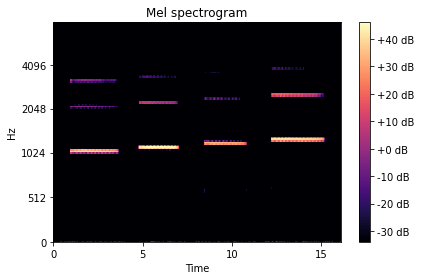

In [44]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
librosa.display.specshow(librosa.amplitude_to_db(S),
                         y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

In [45]:
data_dir = 'instrument_dataset/'
Xtr = np.load(data_dir+'uiowa_train_data.npy')
ytr = np.load(data_dir+'uiowa_train_labels.npy')
Xts = np.load(data_dir+'uiowa_test_data.npy')
yts = np.load(data_dir+'uiowa_test_labels.npy')

In [46]:
# TODO 3
print("the number of training samples is",Xtr.shape[0])
print("The number of test samples is ",Xts.shape[0])
print("The number of features for each sample is ",Xtr.shape[1])
print("The number of classes per class is ",len(np.unique(ytr)))

the number of training samples is 66247
The number of test samples is  14904
The number of features for each sample is  120
The number of classes per class is  10


In [47]:
# TODO 4: Scale the training and test matrices
Xtr_scale = (Xtr-np.mean(Xtr))/np.std(Xtr)
Xts_scale = (Xts-np.mean(Xtr))/np.std(Xtr)

In [48]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Activation
import tensorflow.keras.backend as K

In [49]:
# TODO 5 clear session
K.clear_session()

In [50]:
# TODO 6: construct the model
nh=256
nin=Xtr_scale.shape[1]
nout=int(np.max(ytr)+1)
model=Sequential()
model.add(Dense(units=nh,input_shape=(nin,),activation='sigmoid',name='hidden')) 
model.add(Dense(units=nout,activation='softmax',name='output'))

In [51]:
# TODO 7:  Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 256)               30976     
                                                                 
 output (Dense)              (None, 10)                2570      
                                                                 
Total params: 33,546
Trainable params: 33,546
Non-trainable params: 0
_________________________________________________________________


In [52]:
# TODO 8
from tensorflow.keras import optimizers
opt = optimizers.Adam(lr=0.001)
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [53]:
# TODO 9
hist=model.fit(Xtr_scale, ytr, epochs=10, batch_size=100, validation_data=(Xts_scale,yts))

Epoch 1/10
663/663 [==============================] - 2s 3ms/step - loss: 1.2050 - accuracy: 0.5950 - val_loss: 1.2244 - val_accuracy: 0.5906
Epoch 2/10
663/663 [==============================] - 2s 3ms/step - loss: 0.7809 - accuracy: 0.7450 - val_loss: 0.8721 - val_accuracy: 0.7274
Epoch 3/10
663/663 [==============================] - 2s 3ms/step - loss: 0.6053 - accuracy: 0.8020 - val_loss: 0.6793 - val_accuracy: 0.7851
Epoch 4/10
663/663 [==============================] - 2s 3ms/step - loss: 0.4978 - accuracy: 0.8382 - val_loss: 0.5653 - val_accuracy: 0.8304
Epoch 5/10
663/663 [==============================] - 2s 3ms/step - loss: 0.4233 - accuracy: 0.8663 - val_loss: 0.4829 - val_accuracy: 0.8563
Epoch 6/10
663/663 [==============================] - 2s 3ms/step - loss: 0.3668 - accuracy: 0.8876 - val_loss: 0.4245 - val_accuracy: 0.8785
Epoch 7/10
663/663 [==============================] - 2s 3ms/step - loss: 0.3236 - accuracy: 0.9025 - val_loss: 0.3895 - val_accuracy: 0.8822
Epoch 

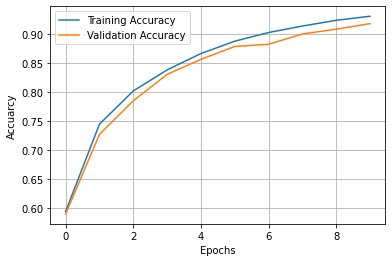

In [54]:
# TODO 10
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.grid()

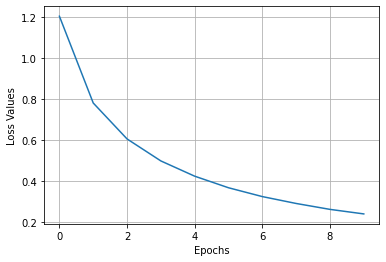

In [55]:
# TODO 11
plt.plot(hist.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss Values')
plt.grid()

In [56]:
rates = [0.01,0.001,0.0001]
batch_size = 100
loss_hist = []

# TODO 12
for lr in rates:
  K.clear_session()
  nin=Xtr_scale.shape[1]
  nout=int(np.max(ytr)+1)
  model=Sequential()
  model.add(Dense(units=nh,input_shape=(nin,),activation='sigmoid',name='hidden')) 
  model.add(Dense(units=nout,activation='softmax',name='output'))
  opt = optimizers.Adam(lr)
  model.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  hist=model.fit(Xtr_scale,ytr,epochs=20,batch_size=100,validation_data=(Xts_scale,yts))
  loss_hist.append(hist.history['loss'])

Epoch 1/20
663/663 [==============================] - 2s 3ms/step - loss: 0.6546 - accuracy: 0.7783 - val_loss: 0.4448 - val_accuracy: 0.8677
Epoch 2/20
663/663 [==============================] - 2s 3ms/step - loss: 0.2785 - accuracy: 0.9046 - val_loss: 0.3351 - val_accuracy: 0.9004
Epoch 3/20
663/663 [==============================] - 2s 3ms/step - loss: 0.1941 - accuracy: 0.9355 - val_loss: 0.3006 - val_accuracy: 0.9163
Epoch 4/20
663/663 [==============================] - 2s 3ms/step - loss: 0.1568 - accuracy: 0.9478 - val_loss: 0.3036 - val_accuracy: 0.9192
Epoch 5/20
663/663 [==============================] - 2s 3ms/step - loss: 0.1369 - accuracy: 0.9541 - val_loss: 0.3395 - val_accuracy: 0.9149
Epoch 6/20
663/663 [==============================] - 2s 3ms/step - loss: 0.1210 - accuracy: 0.9591 - val_loss: 0.3281 - val_accuracy: 0.9107
Epoch 7/20
663/663 [==============================] - 2s 3ms/step - loss: 0.1080 - accuracy: 0.9627 - val_loss: 0.3565 - val_accuracy: 0.9063
Epoch 

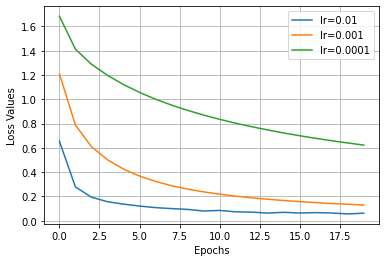

In [57]:
plt.plot(loss_hist[0])
plt.plot(loss_hist[1])
plt.plot(loss_hist[2])
plt.xlabel('Epochs')
plt.ylabel('Loss Values')
plt.legend(['lr=0.01', 'lr=0.001','lr=0.0001'])
plt.grid()

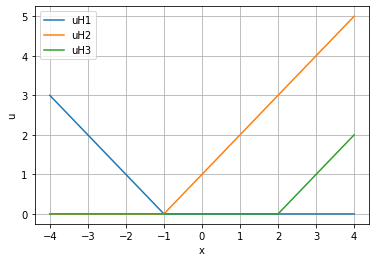

In [69]:
x=[-4,-3,-2,-1,0,1,2,3,4]
x=np.array(x)
uH1=np.maximum(0,-x-1)
uH2=np.maximum(0,x+1)
uH3=np.maximum(0,x-2)
plt.plot(x,uH1)
plt.plot(x,uH2)
plt.plot(x,uH3)
plt.xlabel('x')
plt.ylabel('u')
plt.legend(['uH1','uH2','uH3'])
plt.grid()

In [70]:
WH=np.array([-1,1,1])
bH=np.array([-1,1,-2])
x=np.array([-2,-1,0,3,3.5])
y=np.array([0,0,1,3,3])
zH=x[:,None]*WH[None,:]+bH[None,:]
uH=np.maximum(0,zH)
u=np.hstack((np.ones((5,1)),uH))
w=np.linalg.lstsq(u,y)[0]
bo=w[0]
Wo=w[1:]
x=np.linspace(-4,4)
yhat=linearmodel.predict(x,WH,bH,Wo,bo)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


In [ ]:
def predict(x,Wh,bh,Wo,bo):
  zH=x[:,None]*WH[None,:]+bH[None,:]
  uH=np.maximum(0,zH)
  yhat=uH.dot(Wo)+bo
  return yhat

In [ ]:
yhat=np.sum(a*u,axis=1)/np,sum(a,axis=1)
dL_dyhat=-2*(y-yhat)
usum=np.sum(u,axis=1)
uasum=np.sum(u*a[None,:],axis=1)
dyhat_du=a[None,:]/usum[:,None]-uasum/(usum**2)
dL_du=dL_dyhat[:,None]*dyhat_du